# Support Vector Machines
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.



## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("wine_fraud.csv")

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [10]:
unique_quality = df['quality'].unique()
print(unique_quality)

['Legit' 'Fraud']


**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

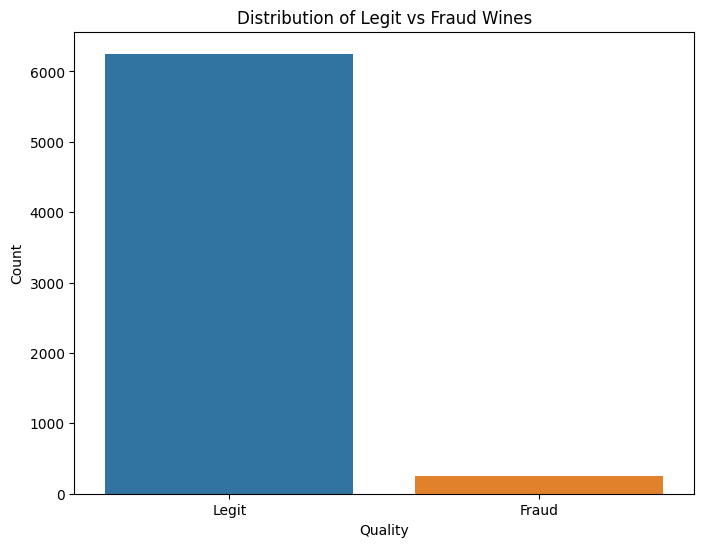

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.title("Distribution of Legit vs Fraud Wines")
plt.xlabel("Quality")
plt.ylabel("Count")

plt.show()

In [12]:
## It is not Balanced

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

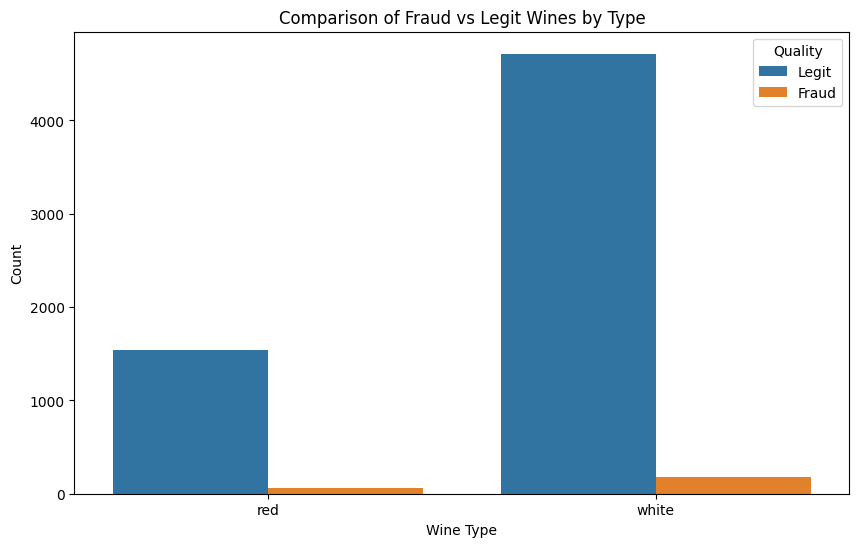

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='quality')
plt.title("Comparison of Fraud vs Legit Wines by Type")
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.legend(title="Quality", labels=["Legit", "Fraud"])

plt.show()

**TASK: What percentage of red wines are Fraud? What percentage
of white wines are fraud?**

In [14]:
red_wines_count = df[df['type'] == 'red']
percentage_fraud_red = (red_wines_count['quality'] == 'Fraud').mean() * 100
print(f"Percentage of fraud in Red Wines: {percentage_fraud_red:.2f}%")

Percentage of fraud in Red Wines: 3.94%


In [15]:
white_wines_count = df[df['type'] == 'white']
percentage_fraud_white = (white_wines_count['quality'] == 'Fraud').mean() * 100
print(f"Percentage of fraud in White Wines: {percentage_fraud_white:.2f}%")

Percentage of fraud in White Wines: 3.74%


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [16]:
# First we map the "quality" column to 0 and 1
quality_mapping = {'Legit': 0, 'Fraud': 1}
df['quality'] = df['quality'].map(quality_mapping)

# Now we can calculate the correlation between features and the "quality" column
correlation = df.corr()['quality'].sort_values(ascending=False)

<ipython-input-16-455cc556486a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['quality'].sort_values(ascending=False)


In [17]:
print(correlation)

quality                 1.000000
volatile acidity        0.151228
chlorides               0.034499
fixed acidity           0.021794
pH                      0.020107
density                 0.016351
sulphates              -0.034046
total sulfur dioxide   -0.035252
residual sugar         -0.048756
alcohol                -0.051141
citric acid            -0.061789
free sulfur dioxide    -0.085204
Name: quality, dtype: float64


**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

<ipython-input-18-98305fda7e34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['quality'].sort_values()


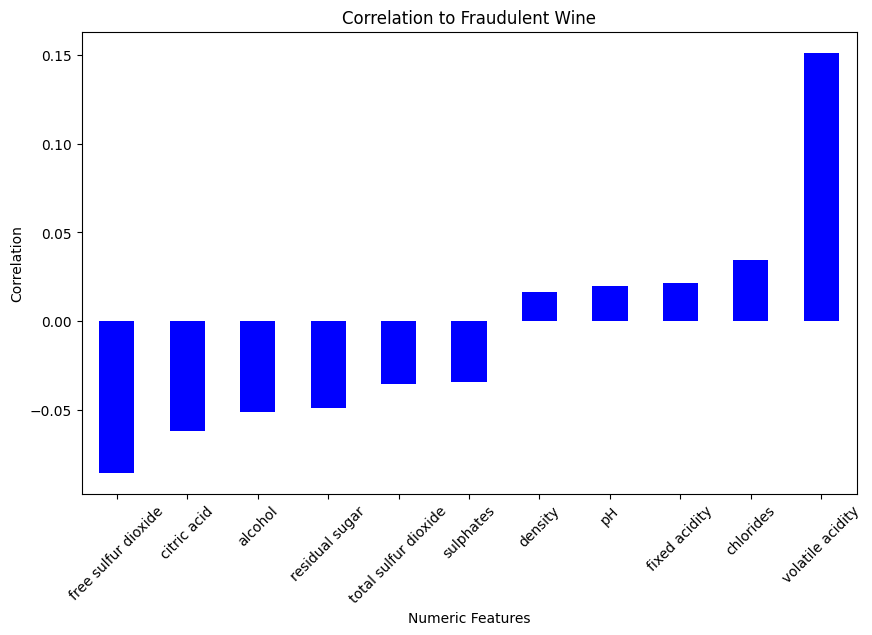

In [18]:
correlation = df.corr()['quality'].sort_values()

# Filter out correlations to "Fraud" wine
correlation_to_fraud = correlation.drop('quality')

# Create the bar plot
plt.figure(figsize=(10, 6))
correlation_to_fraud.plot(kind='bar', color='blue')
plt.title("Correlation to Fraudulent Wine")
plt.xlabel("Numeric Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<ipython-input-19-ba94fecef59e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), cmap="viridis", linewidths=0.5, annot=True, fmt=".2f", cbar=True)


<Figure size 1000x1000 with 0 Axes>

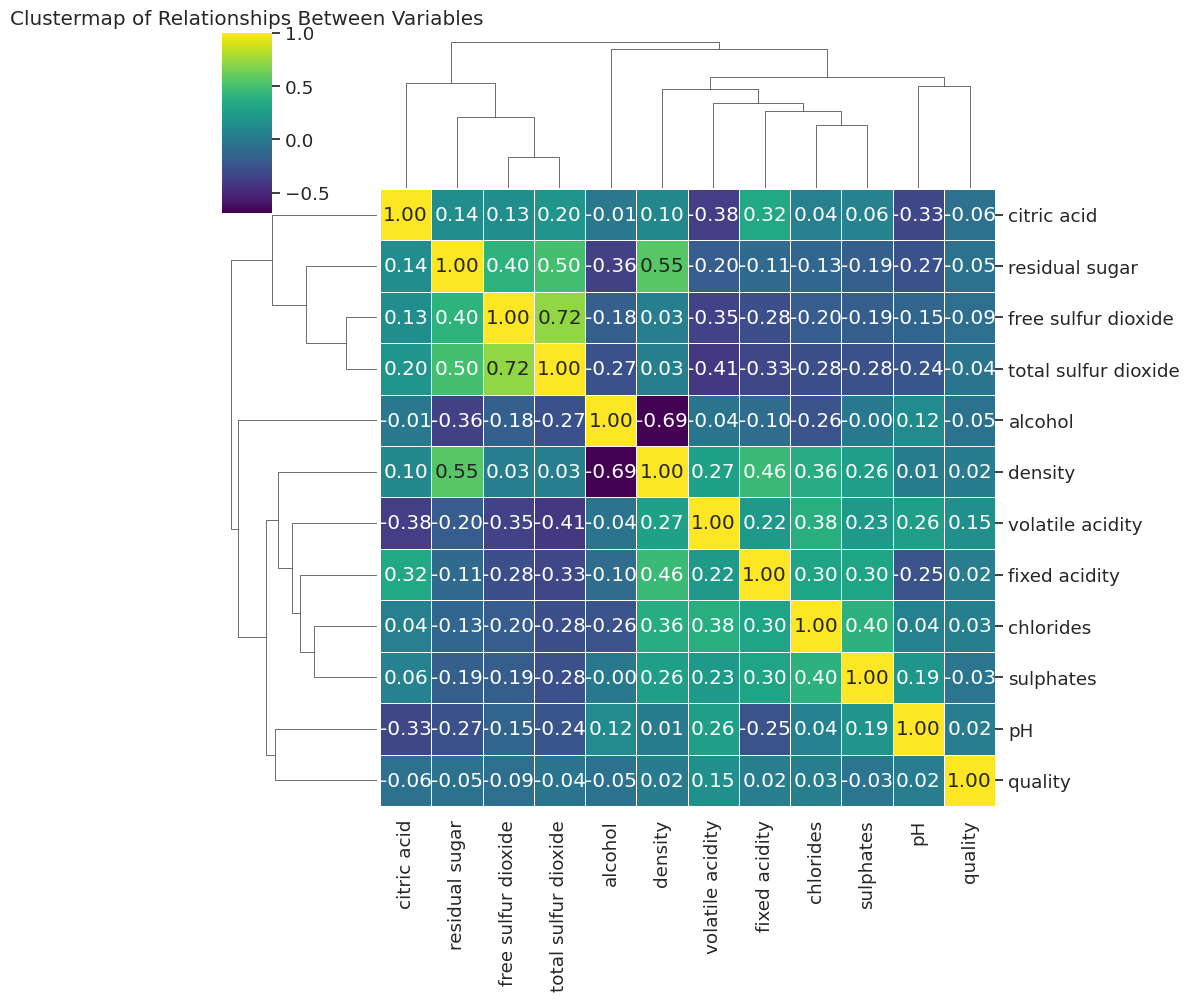

In [19]:
# Create a clustermap
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
sns.clustermap(df.corr(), cmap="viridis", linewidths=0.5, annot=True, fmt=".2f", cbar=True)
plt.title("Clustermap of Relationships Between Variables")
plt.show()

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [20]:
df = pd.get_dummies(df, columns=["type"], drop_first=True)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type_white  
0      9.4        0           0  
1      9.8        

**TASK: Separate out the data into X features and y target label ("quality" column)**

In [21]:

X = df.drop("quality", axis=1)  # X contains all columns except "quality"
y = df["quality"]  # y is the target ("quality" column)


In [22]:
print("X (Features):")
print(X.head())

print("\ny (Target Label):")
print(y.head())

X (Features):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  type_white  
0      9.4           0  
1      9.8           0

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [23]:
from sklearn.model_selection import train_test_split

# We perform a train-test split with a 10% test size and a random state of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Shapes of the training and testing sets:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5847, 12)
y_train shape: (5847,)
X_test shape: (650, 12)
y_test shape: (650,)


**TASK: Scale the X train and X test data.**

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)


In [26]:
# Display the scaled X_train and X_test
print("Scaled X_train:")
print(X_train_scaled)

print("\nScaled X_test:")
print(X_test_scaled)

Scaled X_train:
[[ 1.07925583  2.11467205 -1.50654017 ...  0.79094629 -0.79108083
  -1.75668833]
 [-0.31042998  0.06596159  1.46711941 ... -0.88029647 -0.91642732
   0.56925294]
 [ 0.23000339  1.1056057   0.56810605 ...  0.72409658  1.08911644
  -1.75668833]
 ...
 [ 0.84764153  3.1237384  -1.22992067 ...  0.05559948 -0.33147705
  -1.75668833]
 [-0.69645381  1.59484999 -1.50654017 ... -0.14494965  1.3398094
  -1.75668833]
 [-0.07881568 -0.97368253  1.19049991 ... -0.01125023  0.67129482
   0.56925294]]

Scaled X_test:
[[-0.31042998  1.35022785 -0.67668168 ...  1.92739138  0.5877305
  -1.75668833]
 [-0.61924905 -0.2398161   0.29148655 ... -0.01125023  0.00278024
   0.56925294]
 [-1.00527288 -1.03483807 -0.19259757 ... -1.34824445  2.67683857
   0.56925294]
 ...
 [ 0.23000339 -0.30097163 -0.53837194 ... -0.47919821  0.33703753
   0.56925294]
 [-0.46483951 -0.36212717  0.7064158  ... -0.34549879 -0.91642732
   0.56925294]
 [ 0.07559386 -0.48443824  1.19049991 ...  0.05559948  0.25347321
  

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [27]:
from sklearn.svm import SVC

In [28]:
svm_classifier = SVC(class_weight='balanced')

In [29]:
## We can now use svm_classifier to train and predict

**TASK: Display the confusion matrix and classification report for your model.**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report


In [31]:
# Fit the classifier on your scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)


In [32]:
# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[531  92]
 [ 10  17]]


In [33]:
# Calculate the classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



In [34]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [37]:
filename = 'FrancoBraconi_trained_wine_SVMclassification_model.sav'
pickle.dump(svm_classifier,open(filename,'wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))